# Lab 4.01

## Import the necessary libraries.

In [191]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

In [192]:
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

## First look at its main features (head, shape, info).

In [193]:
display(data.shape)

(9134, 24)

In [194]:
data.head(10)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,...,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2/24/11,Employed,F,55350,...,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize
7,CF85061,Arizona,7216.100311,No,Premium,Master,1/18/11,Unemployed,M,0,...,68,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize
8,DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,14072,...,3,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize
9,BQ94931,Oregon,7388.178085,No,Extended,College,2/17/11,Employed,F,28812,...,7,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize


In [195]:
data.value_counts

<bound method DataFrame.value_counts of      Customer       State  Customer Lifetime Value Response  Coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     Education Effective To Date EmploymentStatus Gender  Income  ...  \
0     Bach

## Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

In [196]:
# had to google to remind me the right function: https://stackoverflow.com/questions/65263146/how-do-i-lowercase-a-string-and-also-change-space-into-underscore-in-python

data.columns = data.columns.str.replace(' ','_').str.lower()

data.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

## Change effective to date column to datetime format.

In [197]:
data['effective_to_date']= pd.to_datetime(data['effective_to_date'], errors='coerce')

In [198]:
print(data['effective_to_date'].dtype)

data['effective_to_date'].head(15)

datetime64[ns]


0    2011-02-24
1    2011-01-31
2    2011-02-19
3    2011-01-20
4    2011-02-03
5    2011-01-25
6    2011-02-24
7    2011-01-18
8    2011-01-26
9    2011-02-17
10   2011-02-21
11   2011-01-06
12   2011-02-06
13   2011-01-10
14   2011-01-18
Name: effective_to_date, dtype: datetime64[ns]

## Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

In [199]:
# print(data.nunique())

# var_count = pd.DataFrame(data.nunique())

# var_count_named = var_count.rename({'a':'name','b':'number'}, axis=1)

# # df2 = df.rename({'a': 'X', 'b': 'Y'}, axis=1)


# var_count_named


data.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [200]:
# def var_type (df):
#     continuous_df = []
#     discrete_df = []
#     for i in var_count:
#         if i [1] > 10: 
#             continuous_df.append(i[0])
        
#         else:
#             discrete_df.append(i[0])
#         return continuous_df,discrete_df

# data = data.apply(var_type)

# ## kijken in de les van 4.02 bij state colom

In [201]:
# var_count.iloc[i][1]


In [202]:
discrete_df = data.select_dtypes(['object'])
continuous_df = data._get_numeric_data()


print(discrete_df.columns)
print(continuous_df.columns)


# discreet data is data that has distinguishable spaces between values like 1 2 3 4 5 6
# continuous data is values that fall on a continuum/ is often measured data

Index(['customer', 'state', 'response', 'coverage', 'education',
       'employmentstatus', 'gender', 'location_code', 'marital_status',
       'policy_type', 'policy', 'renew_offer_type', 'sales_channel',
       'vehicle_class', 'vehicle_size'],
      dtype='object')
Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')


## Plot a correlation matrix, comment what you see.

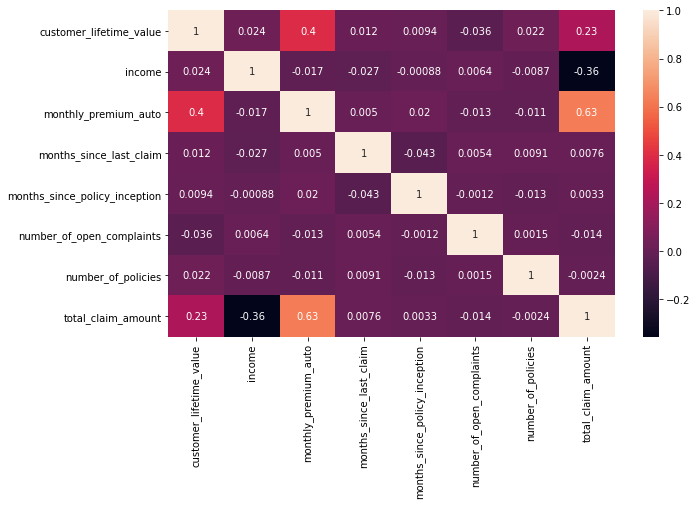

In [203]:
correlations_matrix = continuous_df.corr()

fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(correlations_matrix, annot=True)
plt.show()

# I see here that there are some values that have a strong correlation

## Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

In [ ]:
# dont know how to plot continuous variables.

## Comment what you can see in the plots.

In [ ]:
#cont comment since i have no plots.

## Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

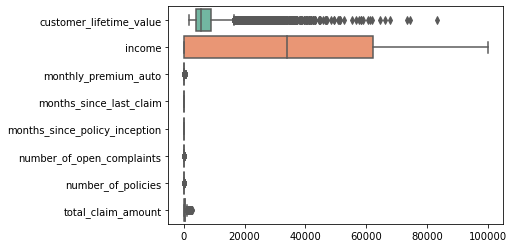

In [207]:
# https://towardsdatascience.com/detecting-and-treating-outliers-in-python-part-1-4ece5098b755

bxplot = sns.boxplot(data=continuous_df, orient="h", palette="Set2")

## Did you find outliers? Comment what you will do with them.




In [218]:
#it looks like the collumns income and customer lifetime value are on a different scale so lets split them up for a better view

continuous1 = continuous_df.drop(['customer_lifetime_value','income'], axis=1, inplace=True)
continuous2 = continuous_df['customer_lifetime_value','income']

print(continuous1)
print(continuous2)
print(continuous_df)

# i dont know why this will not work. i just want to plot boxplots again for both. but it wont let me drop the columns.

None


NameError: name 'continuous2' is not defined

## Check all columns for NaN values. Decide what (if anything) you will need to do with them.

In [221]:
data.isnull().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64